[Local](./ch05.ipynb),
[Github](https://github.com/renyuanL/_ryDsp2020/blob/master/code/ch05.ipynb),
[Colab](https://colab.research.google.com/github/renyuanL/_ryDsp2020/blob/master/code/ch05.ipynb)

[TextBook@greenteapress](http://greenteapress.com/thinkdsp/html/thinkdsp006.html)


# Chapter 5  Autocorrelation

In the previous chapter I characterized white noise as “uncorrelated”, which means that each value is independent of the others, and Brownian noise as “correlated”, because each value depends on the preceding value. In this chapter I define these terms more precisely and present the autocorrelation function, which is a useful tool for signal analysis.

The code for this chapter is in chap05.ipynb, which is in the repository for this book (see Section 0.2). You can also view it at http://tinyurl.com/thinkdsp05.

## 5.1  Correlation

In general, correlation between variables means that if you know the value of one, you have some information about the other. There are several ways to quantify correlation, but the most common is the Pearson product-moment correlation coefficient, usually denoted ρ. 

For  random variables, $X$ and $Y$, 

$
ρ_{XY} = \frac{σ_{XY}}{σ_{X} ~ \cdot ~ σ_{Y}} 
\\
where,
\\
σ_{XY} = E[(X-µ_X) \cdot (Y-µ_Y)]\\ 
σ_X = \sqrt{E[(X-µ_X)^2]}\\
σ_Y = \sqrt{E[(Y-µ_Y)^2]}\\
µ_X = E[X] \\
µ_Y = E[Y] 
$

where, 
- $µ_X$ and $µ_X$ are the `means` of $X$ and $Y$, 
- $σ_X$ and $σ_Y$ are their `standard deviations`,
- $σ_{XY}$ is the `covariance`
- $E[XY]$ is the `correlation`

    - $E[XY] = σ_{XY} + µ_X \cdot µ_Y$


If a random variable, $X$, can be represented 
as an `array` containing N values, 
- $x_0, x_1, ..., x_{N-1}$

the sample mean is:
- $
\bar{X} = \frac{1}{N} ~\cdot~ \sum_{i=0}^{N-1}{x_i} 
$

then,
- $
E[X] \approx \bar{X}
$

we say that 
- $\bar{X}$ is an `unbiased estimate` of $E[X]$


There are 2 ways to estimate the variance,
$
E[(X-µ_X)^2]
$

- (biased estimate)
    - `ddof=0`,
    - 
    $
    E[(X-µ_X)^2] \approx \frac{1}{N} ~\cdot~ \sum_{i=0}^{N-1}{(x_i-\bar{X})^2} 
    $


- (unbiased estimate) 
    - `ddof=1`,
    - 
    $
    E[(X-µ_X)^2]\approx \frac{1}{N-1} ~\cdot~ \sum_{i=0}^{N-1}{(x_i-\bar{X})^2} 
    $

- (biased estimate)
    - `ddof=0`,
    - 
    $
    E[(X-µ_X)(Y-µ_Y)] 
    \approx 
    \frac{1}{N} ~\cdot~ 
    \sum_{i=0}^{N-1}{(x_i-\bar{X})^2 \cdot (y_i-\bar{Y})^2} 
    $ 

- (biased estimate)
    - `ddof=1`,
    - 
    $
    E[(X-µ_X)(Y-µ_Y)] 
    \approx 
    \frac{1}{N-1} ~\cdot~ 
    \sum_{i=0}^{N-1}{(x_i-\bar{X})^2 \cdot (y_i-\bar{Y})^2} 
    $

Pearson’s `correlation coefficient` is always between -1 and +1 (including both). 
- If ρ is positive, we say that the correlation is positive, which means that when one variable is high, the other tends to be high. 
- If ρ is negative, the correlation is negative, so when one variable is high, the other tends to be low.

The magnitude of ρ indicates the strength of the correlation. 
- If ρ is 1 or -1, the variables are perfectly correlated, which means that if you know one, you can make a perfect prediction about the other. 
- If ρ is near zero, the correlation is `probably weak`, so if you know one, it doesn’t tell you much about the others,

I say “probably weak” because it is also possible that there is a nonlinear relationship that is not captured by the coefficient of correlation. 
- Nonlinear relationships are often important in statistics, but less often relevant for signal processing, so I won’t say more about them here.

Python provides several ways to compute correlations. 
- np.corrcoef takes any number of variables and computes a correlation matrix that includes correlations between each pair of variables.

----

![](http://greenteapress.com/thinkdsp/html/thinkdsp026.png)

Figure 5.1: Two sine waves that differ by a phase offset of 1 radian; their coefficient of correlation is 0.54.

I’ll present an example with only two variables. First, I define a function that constructs sine waves with different phase offsets:

```python
def make_sine(offset):
    signal = thinkdsp.SinSignal(freq=440, offset=offset)
    wave = signal.make_wave(duration=0.5, framerate=10000)
    return wave
```

Next, I instantiate two waves with different offsets:

```python
wave1 = make_sine(offset=0)
wave2 = make_sine(offset=1)
```

Figure 5.1 shows what the first few periods of these waves look like. 
- When one wave is high, the other is usually high, so we expect them to be correlated.

```python
>>> corr_matrix = np.corrcoef(wave1.ys, 
                              wave2.ys, 
                              ddof = 0
                             )

[[ 1.    0.54]
 [ 0.54  1.  ]]
```

### Review ...

- np.array(), 
- .concatenate(), 
- .stack(), 
- .hstack(), 
- .vstack()
- .var()
- .cov()
- .correlate()
- .corrcoef()


In [45]:
import numpy as np
# np.corrcoef??
# np.cov??
X= [-2, -1, 0, +1, +2]
Y= [+2, +1, 0, -1, -2]

X= np.array(X)
Y= np.array(Y)

XX= X*X
XY= X*Y
YY= Y*Y
XX, XY, YY

(array([4, 1, 0, 1, 4]), array([-4, -1,  0, -1, -4]), array([4, 1, 0, 1, 4]))

In [43]:
XX.mean()- X.mean()*X.mean()

2.0

In [44]:
XX.size

5

In [3]:
X.var(ddof= 0), X.var(ddof= 1) 

(2.0, 2.5)

In [4]:
XY.mean()- X.mean()*Y.mean()

-2.0

In [5]:
np.cov([X,Y], ddof= 0)  # sigma/ (N) # biased

array([[ 2., -2.],
       [-2.,  2.]])

In [46]:
np.cov([X,Y], ddof= 1) # sigma/ (N-1) # unbiased

array([[ 2.5, -2.5],
       [-2.5,  2.5]])

In [47]:
np.cov?

In [7]:
np.corrcoef([X,Y])

array([[ 1., -1.],
       [-1.,  1.]])

In [8]:
Z= np.concatenate([X,Y])
Z.shape, Z, np.cov(Z)

((10,), array([-2, -1,  0,  1,  2,  2,  1,  0, -1, -2]), array(2.22222222))

In [9]:
Z= np.hstack([X,Y])
Z.shape, Z

((10,), array([-2, -1,  0,  1,  2,  2,  1,  0, -1, -2]))

In [10]:
Z= np.vstack([X,Y])
Z.shape, Z, np.cov(Z)

((2, 5), array([[-2, -1,  0,  1,  2],
        [ 2,  1,  0, -1, -2]]), array([[ 2.5, -2.5],
        [-2.5,  2.5]]))

In [11]:
Z= np.stack([X,Y], axis=0)
Z.shape, Z

((2, 5), array([[-2, -1,  0,  1,  2],
        [ 2,  1,  0, -1, -2]]))

In [12]:
Z= np.stack([X,Y], axis=1)
Z.shape, Z, np.cov(Z)

((5, 2), array([[-2,  2],
        [-1,  1],
        [ 0,  0],
        [ 1, -1],
        [ 2, -2]]), array([[ 8.,  4.,  0., -4., -8.],
        [ 4.,  2.,  0., -2., -4.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-4., -2.,  0.,  2.,  4.],
        [-8., -4.,  0.,  4.,  8.]]))

In [13]:
np.cov(Z)

array([[ 8.,  4.,  0., -4., -8.],
       [ 4.,  2.,  0., -2., -4.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-4., -2.,  0.,  2.,  4.],
       [-8., -4.,  0.,  4.,  8.]])

In [14]:
#np.outer(X,Y),
X= X.reshape(-1,1)
Y= Y.reshape(1,-1)
X@Y/X.size - X.mean()*Y.mean()

array([[-0.8, -0.4,  0. ,  0.4,  0.8],
       [-0.4, -0.2,  0. ,  0.2,  0.4],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.4,  0.2,  0. , -0.2, -0.4],
       [ 0.8,  0.4,  0. , -0.4, -0.8]])

array([[ 1., -1.],
       [-1.,  1.]])

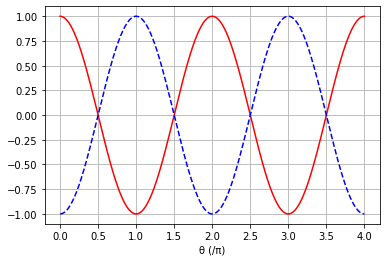

In [51]:
π= np.pi
θ= np.linspace(0, 4*π, 1001)

x= np.cos(θ)
y= np.cos(θ + 1*π)

import matplotlib.pyplot as pl

pl.plot(θ/π,x,'r-',θ/π,y,'b--')
pl.xlabel('θ (/π)')
pl.grid(True)

np.corrcoef([x,y]) #, ddof=0) # ρ belongs to [-1, +1]


`biased` vs `unbiased` estimation:

- The option `ddof = 0` indicates that `.corrcoef()` should divide by $N$, as in the equation above, rather than use the default, $N−1$.

    - ddof=0 v.s. ddof=1, which has effect in .var(), and .cov(), but no effect on .corrcoef()

The result is a `correlation coefficient 【matrix】`: 
- the first element is the correlation of wave1 with itself, which is always 1. 
- Similarly, the last element is the correlation of wave2 with itself.

The off-diagonal elements contain the value we’re interested in, the correlation of wave1 and wave2. 
- The value 0.54 indicates that the strength of the correlation is moderate.

- As the phase offset increases, this correlation decreases until the waves are 180 degrees out of phase, which yields correlation -1. 

- Then it increases until the offset differs by 360 degrees. At that point we have come full circle and the correlation is 1.

![](http://greenteapress.com/thinkdsp/html/thinkdsp027.png)
Figure 5.2: The correlation of two sine waves as a function of the phase offset between them. The result is a cosine.

Figure 5.2 shows the relationship between correlation and phase offset for a sine wave. The shape of that curve should look familiar; it is a cosine.

thinkdsp provides a simple interface for computing the correlation between waves:

```python
class Wave:
    def corr(self, other):
        """Correlation coefficient two waves.

        other: Wave

        returns: float coefficient of correlation
        """
        corr = np.corrcoef(self.ys, other.ys)[0, 1] # row=0, col=1
        return corr
```

```python
>>> wave1.corr(wave2)
0.54
```

## 5.2  Serial correlation

Signals often represent measurements of quantities that vary in time. For example, the sound signals we’ve worked with represent measurements of voltage (or current), which correspond to the changes in air pressure we perceive as sound.

Measurements like this almost always have serial correlation, which is the correlation between each element and the next (or the previous). To compute serial correlation, we can shift a signal and then compute the correlation of the shifted version with the original.

![](fg/fg_serial_corr.PNG)

```python
def serial_corr(wave, lag=1):
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    
    #corr = np.corrcoef(y1, y2, ddof=0)[0, 1] 
    # `ddof=0` has no effect in newer version of numpy
    
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr
```

serial_corr takes a Wave object and lag, which is the integer number of places to shift the wave. It computes the correlation of the wave with a shifted version of itself.

We can test this function with the noise signals from the previous chapter. We expect UU noise to be uncorrelated, based on the way it’s generated (not to mention the name):

```python
signal = thinkdsp.UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
serial_corr(wave)
```

When I ran this example, I got `0.006`, which indicates a very small serial correlation. You might get a different value when you run it, but it should be comparably small.

In a Brownian noise signal, each value is the sum of the previous value and a random “step”, so we expect a strong serial correlation:


```python
signal = thinkdsp.BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
serial_corr(wave)
```

Sure enough, the result I got is greater than `0.999`.

In [52]:
import thinkdsp as td

wW= td.UncorrelatedUniformNoise().make_wave()
wW.apodize()
wW.make_audio()

In [53]:
wG= td.UncorrelatedGaussianNoise().make_wave()
wG.apodize()
wG.make_audio()

In [54]:
wB= td.BrownianNoise().make_wave()
wB.apodize()
wB.make_audio()

In [58]:
def serial_corr(wave, lag=1):
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    
    #corr = np.corrcoef(y1, y2, ddof=0)[0, 1] 
    # `ddof=0` has no effect in newer version of numpy
    
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

scW= serial_corr(wW)#, lag=100)
scG= serial_corr(wG)#, lag=100)
scB= serial_corr(wB)#, lag=100)


scW, scG, scB

(-0.006209896320867816, -0.004763677401966143, 0.9996072431856279)

![](http://greenteapress.com/thinkdsp/html/thinkdsp028.png)
Figure 5.3: Serial correlation for pink noise with a range of parameters.

Since pink noise is in some sense between Brownian noise and UU noise, we might expect an intermediate correlation:

```python
signal = thinkdsp.PinkNoise(beta=1)
wave = signal.make_wave(duration=0.5, framerate=11025)
serial_corr(wave)
```

With parameter β=1, I got a serial correlation of 0.851. As we vary the parameter from β=0, which is uncorrelated noise, to β=2, which is Brownian, serial correlation ranges from 0 to almost 1, as shown in Figure 5.3.

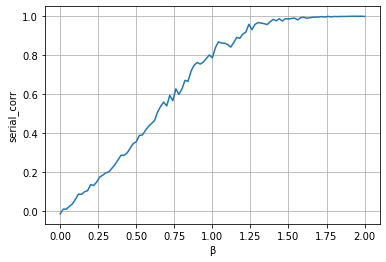

In [20]:
βList= np.linspace(0,2,101)
scList= []
for β in βList:
    wP= td.PinkNoise(beta= β).make_wave()
    sc= serial_corr(wP)
    scList += [sc]
scList= np.array(scList)

pl.plot(βList, scList); 
pl.xlabel('β')
pl.ylabel('serial_corr')
pl.grid(True)

## 5.3  Autocorrelation

In the previous section we computed the correlation between each value and the next, so we shifted the elements of the array by 1. But we can easily compute serial correlations with different lags.

![](http://greenteapress.com/thinkdsp/html/thinkdsp029.png)
Figure 5.4: Autocorrelation functions for pink noise with a range of parameters.

You can think of serial_corr as a function that maps from each value of lag to the corresponding correlation, and we can evaluate that function by looping through values of lag:

```python
def autocorr(wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs
```

- autocorr takes a Wave object and returns the autocorrelation function as a pair of sequences: 
- lags is a sequence of integers from 0 to half the length of the wave; 
- corrs is the sequence of serial correlations for each lag.

Figure 5.4 shows autocorrelation functions for pink noise with three values of β. For low values of β, the signal is less correlated, and the autocorrelation function drops off to zero quickly. For larger values, serial correlation is stronger and drops off more slowly. 

With β=1.7 serial correlation is strong even for long lags; this phenomenon is called `long-range dependence`, because it indicates that each value in the signal depends on many preceding values.

In [21]:
def autocorr(wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

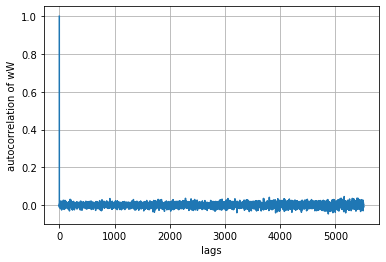

In [62]:
# autocorrelation for white noise
lags, corrs= autocorr(wW)
pl.plot(lags, corrs); 
pl.xlabel('lags')
pl.ylabel('autocorrelation of wW')
#pl.xlim([0,100])
pl.grid(True)

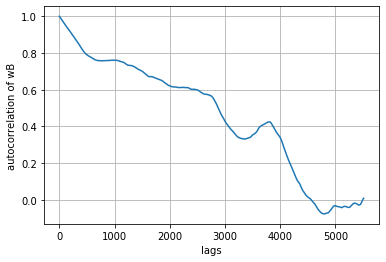

In [64]:
# autocorrelation for Brownian noise
lags, corrs= autocorr(wB)
pl.xlabel('lags')
pl.ylabel('autocorrelation of wB')
#pl.xlim([0,100])
pl.plot(lags, corrs); pl.grid(True)


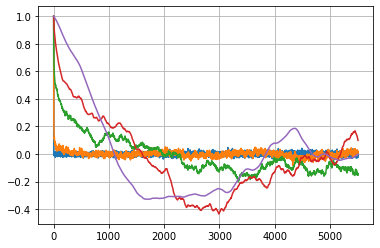

In [65]:
βList= [0,.5, 1, 1.5, 2] #np.linspace(0,2,101)
acList= []
for β in βList:
    wP= td.PinkNoise(beta= β).make_wave()
    lags, corrs= autocorr(wP)
    acList += [(lags, corrs)]
acList
for lags, corrs in acList:
    pl.plot(lags, corrs)
pl.grid(True)

## 5.4  Autocorrelation of periodic signals

The autocorrelation of pink noise has interesting mathematical properties, but limited applications. The autocorrelation of periodic signals is more useful.


![](http://greenteapress.com/thinkdsp/html/thinkdsp030.png)
Figure 5.5: Spectrogram of a vocal chirp.

As an example, I downloaded from freesound.org a recording of someone singing a chirp; the repository for this book includes the file: 28042__bcjordan__voicedownbew.wav.

You can use the Jupyter notebook for this chapter, chap05.ipynb, to play it.

In [67]:
import IPython.display as dp
wFn= 'wav/28042__bcjordan__voicedownbew.wav'
dp.Audio(wFn)

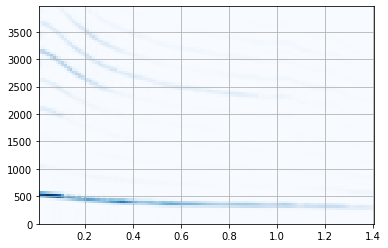

In [66]:
w= td.read_wave(wFn)
w.make_spectrogram(1024).plot(high=4000)

Figure 5.5 shows the spectrogram of this wave. The fundamental frequency and some of the harmonics show up clearly. The chirp starts near 500 Hz and drops down to about 300 Hz, roughly from C5 to E4.

![](http://greenteapress.com/thinkdsp/html/thinkdsp031.png)
Figure 5.6: Spectrum of a segment from a vocal chirp.

To estimate pitch at a particular point in time, we could use the spectrum, but it doesn’t work very well. To see why not, I’ll take a short segment from the wave and plot its spectrum:

```python
    duration = 0.01
    segment = wave.segment(start=0.2, duration=duration)
    spectrum = segment.make_spectrum()
    spectrum.plot(high=1000)
```

This segment starts at 0.2 seconds and lasts 0.01 seconds. Figure 5.6 shows its spectrum. There is a clear peak near 400 Hz, but it is hard to identify the pitch precisely. The length of the segment is 441 samples at a framerate of 44100 Hz, so the frequency resolution is 100 Hz (see Section 3.5). That means the estimated pitch might be off by 50 Hz; in musical terms, the range from 350 Hz to 450 Hz is about 5 semitones, which is a big difference!

We could get better frequency resolution by taking a longer segment, but since the pitch is changing over time, we would also get `“motion blur”` (模糊
blur, vague, faintness, illegibility, dark); 

that is, the peak would spread between the start and end pitch of the segment, as we saw in Section 3.3.

We can estimate pitch more precisely using `"autocorrelation"`. If a signal is periodic, we expect the autocorrelation `to spike when the lag equals the period`.

![](http://greenteapress.com/thinkdsp/html/thinkdsp032.png)
Figure 5.7: Two segments from a chirp, one starting 0.0023 seconds after the other.

To show why that works, I’ll plot two segments from the same recording.

```python
import matplotlib.pyplot as plt

def plot_shifted(wave, offset=0.001, start=0.2):
    segment1 = wave.segment(start=start, duration=0.01)
    segment1.plot(linewidth=2, alpha=0.8)

    segment2 = wave.segment(start=start-offset, duration=0.01)
    segment2.shift(offset)
    segment2.plot(linewidth=2, alpha=0.4)

    corr = segment1.corr(segment2)
    text = r'$\rho =$ %.2g' % corr
    plt.text(segment1.start+0.0005, -0.8, text)
    plt.xlabel('Time (s)')
```

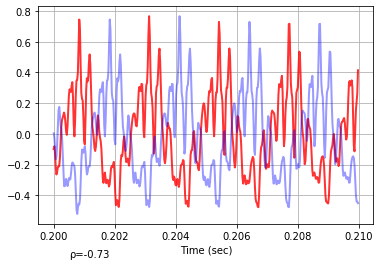

In [68]:
import matplotlib.pyplot as plt

def plot_shifted(wave, offset=0.001, start=0.2):
    segment1 = wave.segment(start=start, duration=0.01)
    segment1.plot(linewidth=2, alpha=0.8, color='r')

    segment2 = wave.segment(start=start-offset, duration=0.01)
    segment2.shift(offset)
    segment2.plot(linewidth=2, alpha=0.4, color='b')

    corr = segment1.corr(segment2)
    text = f'ρ={corr:.2g}' #r'$\rho =$ %.2g' % corr
    plt.text(segment1.start+0.0005, -0.8, text)
    plt.xlabel('Time (sec)')

plot_shifted(w)

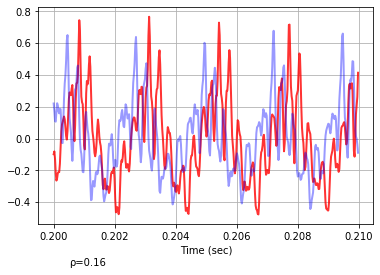

In [74]:
plot_shifted(w, offset=0.02)


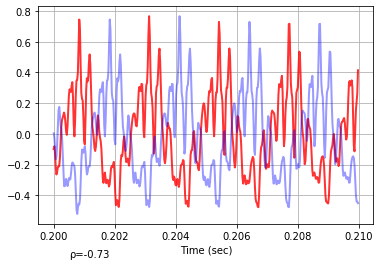

In [28]:
plot_shifted(w, offset=0.001)

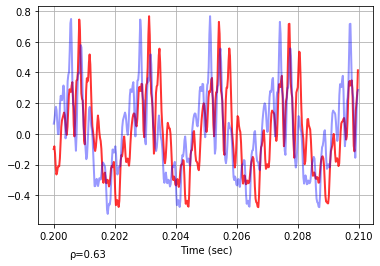

In [29]:
plot_shifted(w, offset=0.002)


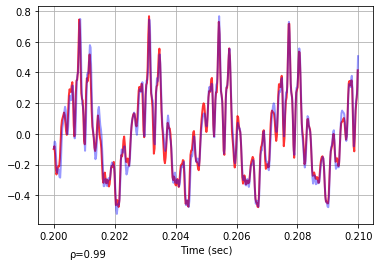

In [30]:
plot_shifted(w, offset=0.0023)

# when offset == .0023
# the 2 signals "almost" overlap to each other

One segment starts at 0.2 seconds; the other starts 0.0023 seconds later. 

Figure 5.7 shows the result. The segments are similar, and their correlation is  `ρ=0.99`. This result suggests that the period is near `0.0023` seconds, which corresponds to a frequency of 435 Hz.

![](http://greenteapress.com/thinkdsp/html/thinkdsp033.png)
Figure 5.8: Autocorrelation function for a segment from a chirp.

For this example, I estimated the period by trial and error. To automate the process, we can use the autocorrelation function.

```python
    lags, corrs = autocorr(segment)
    plt.plot(lags, corrs)
```

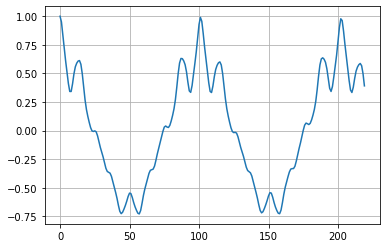

In [79]:
import matplotlib.pyplot as pl

duration= 0.01
segment=  w.segment(start= 0.2, duration= duration)
#spectrum = segment.make_spectrum()
#spectrum.plot(high=1000)
    
lags, corrs = autocorr(segment)

pl.plot(lags, corrs)
pl.grid(True)

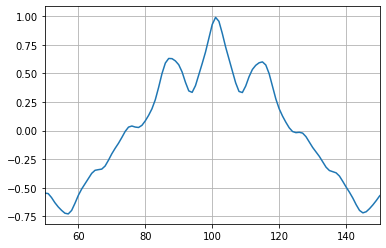

In [80]:
pl.xlim([50,150])
pl.plot(lags, corrs)
pl.grid(True)

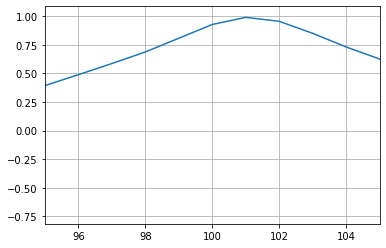

In [81]:
pl.xlim([95,105])
pl.plot(lags, corrs)
pl.grid(True)

(1.4280272108843537, 44100)

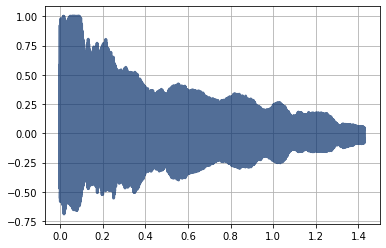

In [92]:
w.plot()

w.duration, w.framerate

In [82]:
# in the following, I apply the autocorelation function
# to estimate the PITCH of wave
corrs= np.array(corrs)

τ0= 1  # excluding τ <= τ0
τPeak= τ0 + corrs[τ0:].argmax() 
lagPeak= lags[τPeak]
lagPeak

101

In [83]:
segment.framerate

44100

In [84]:
Δt=  1/segment.framerate # (sec) # 
period= lagPeak * Δt     # (sec)
freq= 1 / period         # (Hz)
freq # == 436.6 Hz

436.63366336633663

Figure 5.8 shows the autocorrelation function for the segment starting at t=0.2 seconds. The first peak occurs at lag=101. We can compute the frequency that corresponds to that period like this:

```python
    period = lag / segment.framerate
    frequency = 1 / period
```    

The estimated fundamental frequency is 437 Hz. To evaluate the precision of the estimate, we can run the same computation with lags 100 and 102, which correspond to frequencies 432 and 441 Hz. 

The frequency precision using autocorrelation is less than 10 Hz, compared with 100 Hz using the spectrum. In musical terms, the expected error is about 30 cents (a third of a semitone).

- (the interval of a semitone is divided into 100 cents)

## 5.5  Correlation as dot product

I started the chapter with this definition of `Pearson’s correlation coefficient`:

$
ρ = {\sum_{i=0}^{N-1}~~(x_i − µ_X) \cdot (y_i − µ_Y) 
     \over {N \cdot σ_X \cdot σ_Y} }
$

Then I used ρ to define serial correlation and autocorrelation. That’s consistent with how these terms are used in statistics, but in the context of signal processing, the definitions are a little different.

In signal processing, we are often working with `unbiased` signals, where the `mean is 0`, and `normalized` signals, where the `standard deviation is 1`. 

In that case, the definition of ρ simplifies to:

$
ρ = {\sum_{i=0}^{N-1}~~(x_i)\cdot(y_i) \over {N} }
$

And it is common to simplify even further:

$
r = \sum_{i=0}^{N-1}~~(x_i)\cdot(y_i)
$

This definition of correlation is not “standardized”, so it doesn’t generally fall between -1 and 1. But it has other useful properties.

If you think of $x$ and $y$ as vectors, you might recognize this formula as the dot product, $x · y$ 

See [Dot_product@Wiki](http://en.wikipedia.org/wiki/Dot_product)

The dot product indicates the degree to which the signals are similar. If they are normalized so their standard deviations are 1,

$
x · y = cos(θ)
$

where θ is the angle between the vectors. And that explains why Figure 5.2 is a cosine curve.

(0.9999999999999998, 0.9999999999999998, 4.999999999999999, array([5.]))

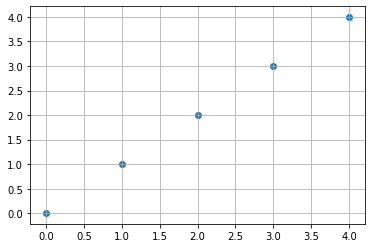

In [36]:
import numpy as np
import matplotlib.pyplot as pl

x= np.array([0,1,2,3,4])
y= x #np.array([4,-3,2,-1,0])
pl.scatter(x,y);pl.grid()

μx= x.mean()
σx= x.std()
μy= y.mean()
σy= y.std()

np.sum( (x-μx)/σx
       *(y-μy)/σy
      )/x.size,\
\
np.dot((x-μx)/σx,
       (y-μy)/σy
      ) /x.size,\
\
np.dot((x-μx)/σx,
       (y-μy)/σy
      ),\
np.correlate((x-μx)/σx,
       (y-μy)/σy
      )

In [37]:
np.correlate?

In [38]:
x,\
y,\
np.correlate(x, y, mode='valid'),\
np.correlate(x, y, mode='same'),\
np.correlate(x, y, mode='full')

(array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4]),
 array([30]),
 array([11, 20, 30, 20, 11]),
 array([ 0,  4, 11, 20, 30, 20, 11,  4,  0]))

In [39]:
R= []

N= x.size
for τ in range(-(N-1), N):  
    if τ<0:
        r= np.sum(x[0:N+τ]*y[-τ:N])
    else: #if τ>=0:
        r= np.sum(x[τ:N]*y[0:N-τ])
    
    R += [r]

R # == np.correlate(x, y, mode='full')

[0, 4, 11, 20, 30, 20, 11, 4, 0]

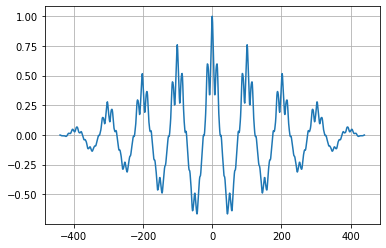

In [40]:

y= segment.ys

R= np.correlate(y, y, mode='full')
τ= np.arange(-(y.size-1), y.size)
pl.plot(τ, R/R.max()); pl.grid()

## 5.6  Using NumPy

![](http://greenteapress.com/thinkdsp/html/thinkdsp034.png)
Figure 5.9: Autocorrelation function computed with np.correlate.

NumPy provides a function, `np.correlate()`, that computes the correlation of two functions or the autocorrelation of one function. We can use it to compute the autocorrelation of the segment from the previous section:

```python
corrs2 = np.correlate(segment.ys, segment.ys, mode='same')
```

The option mode tells correlate what range of lag to use. With the value ’same’, the range is from −N/2 to N/2, where N is the length of the wave array.

Figure 5.9 shows the result. It is symmetric because the two signals are identical, so a negative lag on one has the same effect as a positive lag on the other. To compare with the results from autocorr, we can select the second half:

```python
    N = len(corrs2)
    half = corrs2[N//2:]
```

If you compare Figure 5.9 to Figure 5.8, you’ll notice that the correlations computed by np.correlate get smaller as the lags increase. That’s because np.correlate uses the unstandardized definition of correlation; as the lag gets bigger, the overlap between the two signals gets smaller, so the magnitude of the correlations decreases.

We can correct that by dividing through by the lengths:

```python
    lengths = range(N, N//2, -1)
    half /= lengths
```
Finally, we can standardize the results so the correlation with lag=0 is 1.

```python
    half /= half[0]
```

With these adjustments, the results computed by autocorr and np.correlate are nearly the same. They still differ by 1-2%. The reason is not important, but if you are curious: autocorr standardizes the correlations independently for each lag; for np.correlate, we standardized them all at the end.

More importantly, now you know what autocorrelation is, how to use it to estimate the fundamental period of a signal, and two ways to compute it.

## 5.7  Exercises

Solutions to these exercises are in chap05soln.ipynb.

- Exercise 1   

The Jupyter notebook for this chapter, chap05.ipynb, includes an interaction that lets you compute autocorrelations for different lags. Use this interaction to estimate the pitch of the vocal chirp for a few different start times.

- Exercise 2   

The example code in chap05.ipynb shows how to use autocorrelation to estimate the fundamental frequency of a periodic signal. Encapsulate this code in a function called estimate_fundamental, and use it to track the pitch of a recorded sound.
To see how well it works, try superimposing your pitch estimates on a spectrogram of the recording.

- Exercise 3   

If you did the exercises in the previous chapter, you downloaded the historical price of BitCoins and estimated the power spectrum of the price changes. Using the same data, compute the autocorrelation of BitCoin prices. Does the autocorrelation function drop off quickly? Is there evidence of periodic behavior?

- Exercise 4   

In the repository for this book you will find a Jupyter notebook called saxophone.ipynb that explores autocorrelation, pitch perception, and a phenomenon called the missing fundamental. Read through this notebook and run the examples. Try selecting a different segment of the recording and running the examples again.
Vi Hart has an excellent video called “What is up with Noises? (The Science and Mathematics of Sound, Frequency, and Pitch)”; it demonstrates the missing fundamental phenomenon and explains how pitch perception works (at least, to the degree that we know). Watch it at https://www.youtube.com/watch?v=i_0DXxNeaQ0.